In [1]:
# Step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Step 2
from tensorflow.keras import datasets
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


(None, ((10000, 28, 28), (10000,)))

In [3]:
pd.Series(y_train).sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# We want to one hot encode this label of 10 digits...

In [4]:
# Step 3
from tensorflow.keras.utils import to_categorical

In [5]:
y_train.shape

(60000,)

In [6]:
y_cat_train = to_categorical(y_train)
y_cat_train.shape

(60000, 10)

In [7]:
y_cat_test = to_categorical(y_test)
y_cat_test.shape

(10000, 10)

WE can now see its 1 or 0, 1 for the actual class 0 for all other digits instead of the normal 1,2,3,4,...

In [9]:
y_train[0]

5

In [10]:
# Step 4 - Scale Data
X_train = X_train/255  #or /X_train.max()
X_test = X_test/255

In [11]:
# Step 5 - Reshape data
# batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Building Model

In [12]:
# Step 6
img = np.squeeze(X_train[7].reshape(28,28))
img.shape

(28, 28)

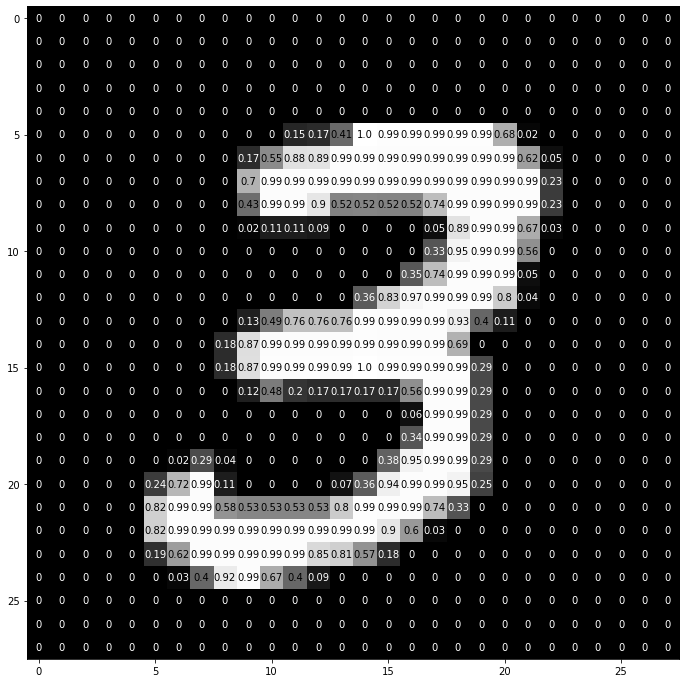

In [13]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                color = 'white' if img[x][y]<thresh else 'black')

# Model Architecture

In [14]:
# Step 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
# Step 8
# Filters: the more complex the data the more filters youre expected to have
# The larger the images, the more the variety in the image, the more classes you need
# the more filters requires

model = Sequential()
 
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
                 padding='valid', input_shape = (28,28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation ='relu'))

model.add(Dense(10, activation ='softmax'))
 
model.compile(loss="categorical_crossentropy", optimizer = 'adam',
              metrics =["categorical_accuracy"])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [18]:
# Step 9
model.fit(X_train, y_cat_train, epochs=10, verbose=1, validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1538 - categorical_accuracy: 0.9536 - val_loss: 0.0580 - val_categorical_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0514 - categorical_accuracy: 0.9839 - val_loss: 0.0425 - val_categorical_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0323 - categorical_accuracy: 0.9897 - val_loss: 0.0410 - val_categorical_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0218 - categorical_accuracy: 0.9931 - val_loss: 0.0519 - val_categorical_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0141 - categorical_accuracy: 0.9952 - val_loss: 0.0444 - val_categorical_accuracy: 0.9867


In [19]:
# Step 10
metrics = pd.DataFrame(model.history.history)
metrics

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.153787,0.953567,0.057984,0.9809
1,0.051439,0.983917,0.042523,0.9860
2,0.032334,0.989667,0.041040,0.9866
3,0.021762,0.993150,0.051918,0.9838
4,0.014063,0.995233,0.044435,0.9867


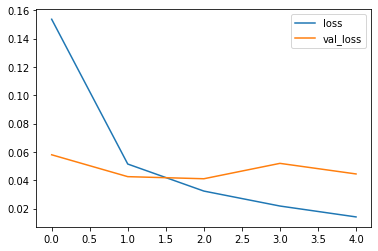

In [20]:
metrics[['loss', 'val_loss']].plot()

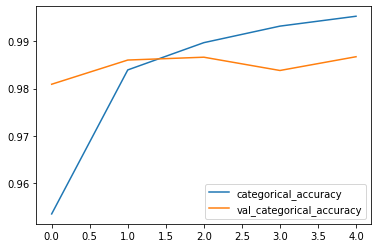

In [21]:
metrics[['categorical_accuracy', 'val_categorical_accuracy']].plot()

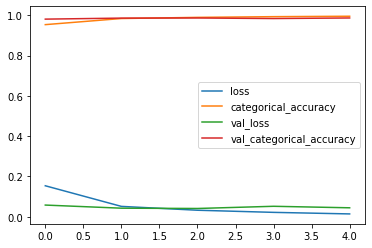

In [22]:
metrics.plot()

# Prediction and Evaluation

In [23]:
model.metrics_names

['loss', 'categorical_accuracy']

In [24]:
model.evaluate(X_test,y_cat_test, verbose=0)

[0.044435497373342514, 0.9866999983787537]

In [26]:
# Step 12
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(X_test)

print(classification_report(predictions, y_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       1.00      0.99      0.99      1141
           2       0.99      0.99      0.99      1026
           3       0.99      0.98      0.99      1024
           4       0.99      0.99      0.99       986
           5       0.99      0.98      0.98       903
           6       0.98      1.00      0.99       941
           7       1.00      0.98      0.99      1049
           8       0.98      0.99      0.98       960
           9       0.97      0.99      0.98       988

    accuracy                           0.99     10000
   macro avg    

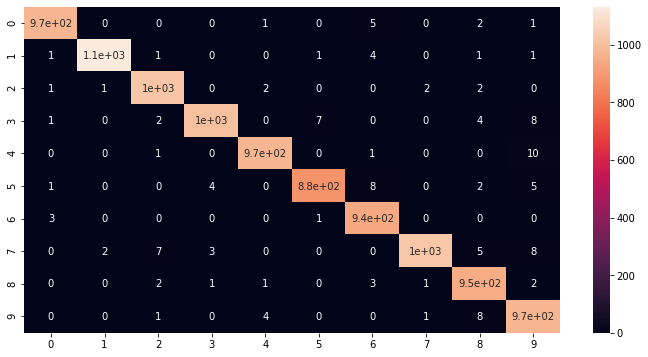

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(predictions, y_test), annot=True)

# Testing model on new image
- from our test set

In [32]:
# Step 13
sample_one = np.expand_dims(X_test[11], axis=0)
model.predict_classes(sample_one)

array([6])

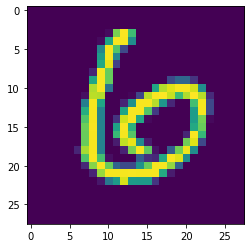

In [33]:
plt.imshow(X_test[11].reshape(28,28))